##### How would you differentiate the results from different shifts according to the mineralogical characteristics?

#### The shift system used in the site. The day shift starts at 07:00 am and ends at 07:00 pm. The night shift is the complement to that.

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add Timestamp data 
ore_data=pd.read_csv(r"file:///C:\Users\PortiaMa\OneDrive%20-%20mintek.co.za\Documents\Data.csv")
ore_data.head()

C:\Users\PortiaMa\AppData\Local\Temp\ipykernel_13980\1289719842.py:6: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,42,43,44,45,46,47,48,49,50,53,54,55,56,57,58,59,60,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,150,151,152,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174) have mixed types. Specify dtype option on import or set low_memory=False.
  ore_data=pd.read_csv(r"file:///C:\Users\PortiaMa\OneDrive%20-%20mintek.co.za\Documents\Data.csv")


,timestamp,210:CRG0001_KW,210:CV001_FINO,210:CV001_GRUESO,210:CV001_INTERM1,210:CV001_INTERM2,210:HOP_FINO,210:HOP_GRUESO,210:HOP_INTERM,210:WI00115,...,330:XRF_CRS3.Sol,330:XRF_RF003.Cu,330:XRF_RF003.Fe,330:XRF_RF003.Sol,330:XRF_SAL17.Cu,330:XRF_SAL18.Cu,C:310_TonHumMol,LIMS:Cabeza_Cu.Esp,LIMS:Concentrado_Cu.Esp,LIMS:Relave_Cu.Esp
0,2023-09-01 07:00:00-05:00,428.6447,0.0,0,0,0,0.000208251,0,0,2064.37,...,38.24622,0.2281283,2.242711,43.87353,0.040072,0.03366,4321.29,0.2199621,25.32975,0.0319834
1,2023-09-01 07:10:00-05:00,617.9507,32.71233,23.56759,20.24949,22.97453,0.000208251,0,0,5593.605,...,37.82159,0.2347573,2.351156,45.92285,0.037431,0.042279,4163.601,0.2199621,25.32975,0.0319834
2,2023-09-01 07:20:00-05:00,427.9856,41.30634,11.89185,22.66584,16.28979,0.000208251,0,0,5846.607,...,38.86111,0.2308349,2.288843,43.17145,0.039929,0.045171,4259.805,0.2199621,25.32975,0.0319834
3,2023-09-01 07:30:00-05:00,171.8239,32.48199,14.89198,24.20546,20.29427,0.000208251,0,0,5827.908,...,38.60137,0.2213846,2.347039,44.01982,0.037181,0.043309,4272.023,0.2199621,25.32975,0.0319834
4,2023-09-01 07:40:00-05:00,503.6085,0.0,0,0,0,0.000208251,0,0,223.518,...,38.35864,0.2302038,2.35902,43.65567,0.037181,0.042571,4258.003,0.2199621,25.32975,0.0319834


In [3]:
# Convert the 'timestamp' column to datetime format, replace 'timestamp' 
ore_data['timestamp'] = pd.to_datetime(ore_data['timestamp'])
ore_data['timestamp']
ore_data['shift'] = ore_data['timestamp'].apply(lambda x: 0 if 7 <= x.hour < 19 else 1)
ore_data['shift']

0        0
1        0
2        0
3        0
4        0
        ..
18212    0
18213    0
18214    0
18215    0
18216    1
Name: shift, Length: 18217, dtype: int64

In [4]:
# Replace Mineralogical data 
small_mineral= ore_data[['shift','330:XRF_RF003.Cu', '330:XRF_SAL17.Cu', '330:XRF_SAL18.Cu']]
small_mineral=small_mineral.apply(lambda X : pd.to_numeric(X,errors='coerce'))#very important change to numeric
small_mineral.dtypes

shift                 int64
330:XRF_RF003.Cu    float64
330:XRF_SAL17.Cu    float64
330:XRF_SAL18.Cu    float64
dtype: object

In [6]:
## remove null 
small_mineral=small_mineral.dropna()
small_mineral

,shift,330:XRF_RF003.Cu,330:XRF_SAL17.Cu,330:XRF_SAL18.Cu
0,0,0.228128,0.040072,0.033660
1,0,0.234757,0.037431,0.042279
2,0,0.230835,0.039929,0.045171
3,0,0.221385,0.037181,0.043309
4,0,0.230204,0.037181,0.042571
...,...,...,...,...
18212,0,0.566084,0.060874,0.078629
18213,0,0.545628,0.063310,0.074502
18214,0,0.523068,0.069405,0.070654
18215,0,0.509332,0.069405,0.076784


In [7]:
mineralogical_stats = small_mineral.groupby('shift').agg({
    '330:XRF_RF003.Cu': ['mean', 'std'],
    '330:XRF_SAL17.Cu': ['mean', 'std'],'330:XRF_SAL18.Cu': ['mean', 'std']
})
mineralogical_stats

330:XRF_RF003.Cu           330:XRF_SAL17.Cu           330:XRF_SAL18.Cu  \
                  mean       std             mean       std             mean   
shift                                                                          
0             0.537318  0.240470         0.079610  0.038858         0.092430   
1             0.539556  0.236569         0.077589  0.036594         0.090438   

                 
            std  
shift            
0      0.048559  
1      0.042812

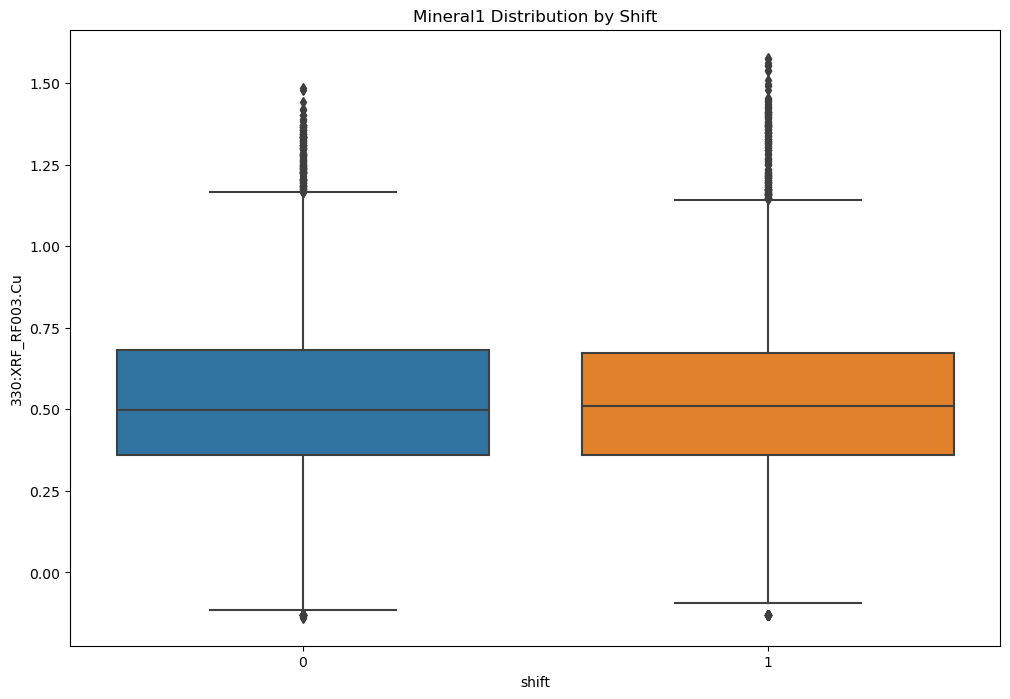

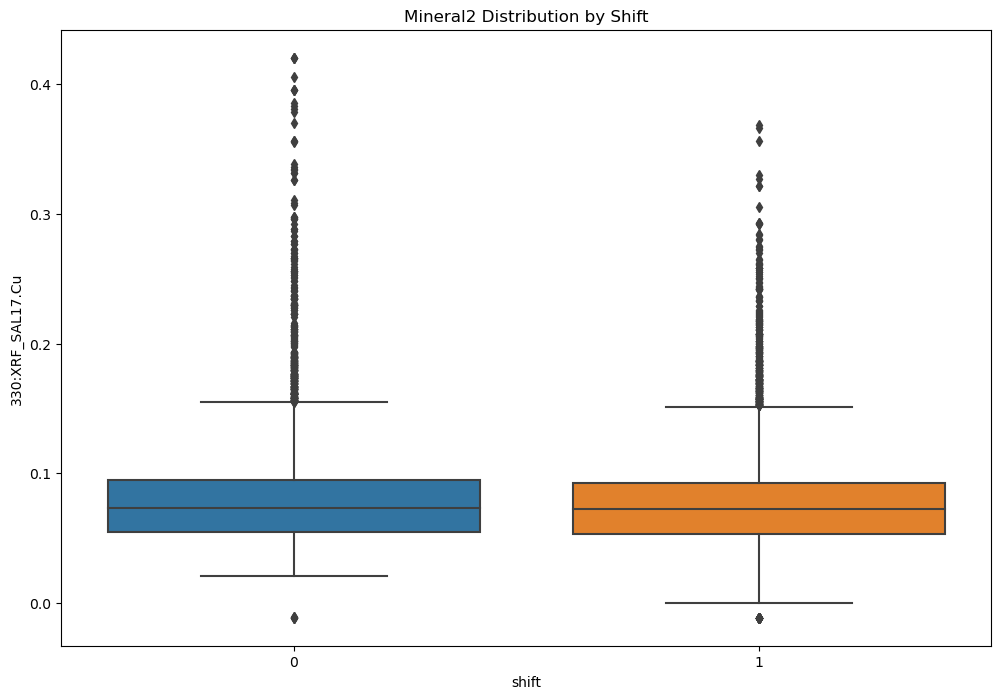

In [8]:
# Visualization - Box Plots
plt.figure(figsize=(12, 8))
sns.boxplot(x='shift', y='330:XRF_RF003.Cu', data=small_mineral)
plt.title('Mineral1 Distribution by Shift')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='shift', y='330:XRF_SAL17.Cu', data=small_mineral)
plt.title('Mineral2 Distribution by Shift')
plt.show()

In [9]:
# Statistical Tests
from scipy.stats import ttest_ind

day_shift_data = small_mineral[small_mineral['shift'] == 0]
day_shift_data.head()
print(day_shift_data.isna().sum())
print(day_shift_data.describe())
print(day_shift_data.dtypes)
night_shift_data = small_mineral[small_mineral['shift'] == 1]
print(night_shift_data.dtypes)
print(night_shift_data.head())

result1=ttest_ind(day_shift_data['330:XRF_RF003.Cu'], night_shift_data['330:XRF_RF003.Cu'],nan_policy="omit")
result2 = ttest_ind(day_shift_data['330:XRF_SAL17.Cu'], night_shift_data['330:XRF_SAL17.Cu'],nan_policy="omit")

print(f'T-statistic for Mineral1: {result1.statistic}, p-value: {result1.pvalue}')
print(f'T-statistic for Mineral2: {result2.statistic}, p-value: {result2.pvalue}')

shift               0
330:XRF_RF003.Cu    0
330:XRF_SAL17.Cu    0
330:XRF_SAL18.Cu    0
dtype: int64
        shift  330:XRF_RF003.Cu  330:XRF_SAL17.Cu  330:XRF_SAL18.Cu
count  8872.0       8872.000000       8872.000000       8872.000000
mean      0.0          0.537318          0.079610          0.092430
std       0.0          0.240470          0.038858          0.048559
min       0.0         -0.138813         -0.011338         -0.014531
25%       0.0          0.359448          0.054424          0.062534
50%       0.0          0.497247          0.073206          0.084107
75%       0.0          0.681960          0.094607          0.111375
max       0.0          1.486076          0.420424          0.612422
shift                 int64
330:XRF_RF003.Cu    float64
330:XRF_SAL17.Cu    float64
330:XRF_SAL18.Cu    float64
dtype: object
shift                 int64
330:XRF_RF003.Cu    float64
330:XRF_SAL17.Cu    float64
330:XRF_SAL18.Cu    float64
dtype: object
    shift  330:XRF_RF003.Cu  330:XR

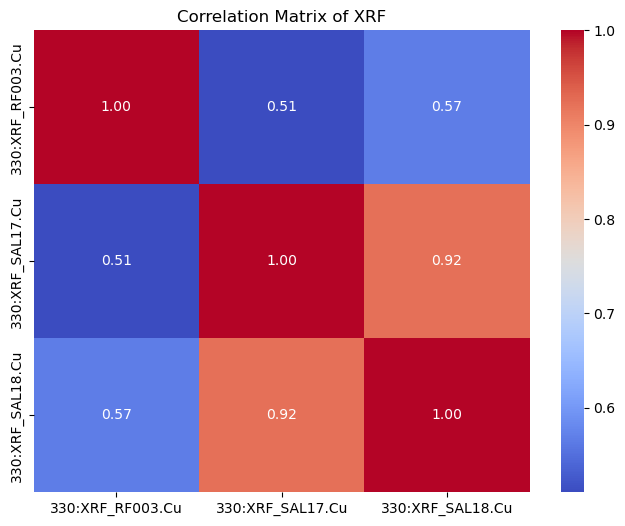

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of XRF')
plt.show()

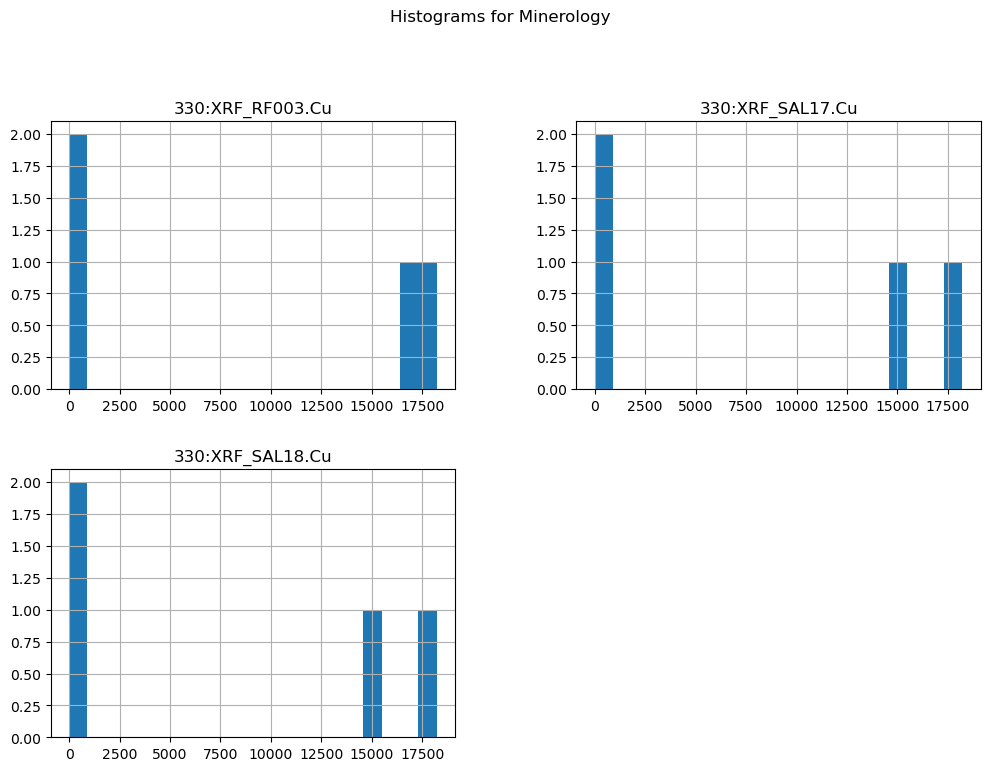

In [9]:
# minerals

# Histogram for each mineral origin
minerals[['330:XRF_RF003.Cu', '330:XRF_SAL17.Cu', '330:XRF_SAL18.Cu']].hist(figsize=(12, 8), bins=20)
plt.suptitle('Histograms for Minerology', y=1.02)
plt.show()